In [1]:

%matplotlib widget
import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../

import pylib.mix as mix
import pylib.measurement as mse
import est_qsvt as eqsvt

35584
c:\Users\novikau1\Documents\work\codes\QuCF\scripts-py


In [2]:
for i in range(30):
    plt.close()

In [3]:
# ----------------------------------------------------------------------
# Compute coefficients for the estimation of the QSVT angles necessary
# for the inversion of a matrix with an arbitrary condition number.
# ----------------------------------------------------------------------

In [5]:
# -----------------------------------------
# --- Read data ----
# -----------------------------------------
mix.reload_module(eqsvt)

flag_save_gl_ = True

id_case_ = 3
Ncoefs_ = 40
dds_, id_comp_, fname_, path_root_, path_save_plots_ = eqsvt.read_ref_QSVT_angles(id_case_, Ncoefs_)


----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-2/k20_eps13.hdf5
when simulated:  02-02-2024 21:58:16

function-type: 		inversion
function-parity: 		1
param: 			20.000000
absolute error: 	1.022e-13
norm. factor: 		1.250e-01
Number of angles: 	1014

----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-2/k40_eps13.hdf5
when simulated:  02-02-2024 21:59:13

function-type: 		inversion
function-parity: 		1
param: 			40.000000
absolute error: 	8.032e-14
norm. factor: 		1.250e-01
Number of angles: 	2496

----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-2/k60_eps13.hdf5
when simulated:  02-02-2024 22:01:18

function-type: 		inversion
function-parity: 		1
param: 			60.000000
absolute error: 	1.054e-13
norm. factor: 		1.250e-01
Number of angles: 	4156

----------------------------------------
Reading angles from

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//phis_k40.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//phis_k60.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//phis_k80.dat


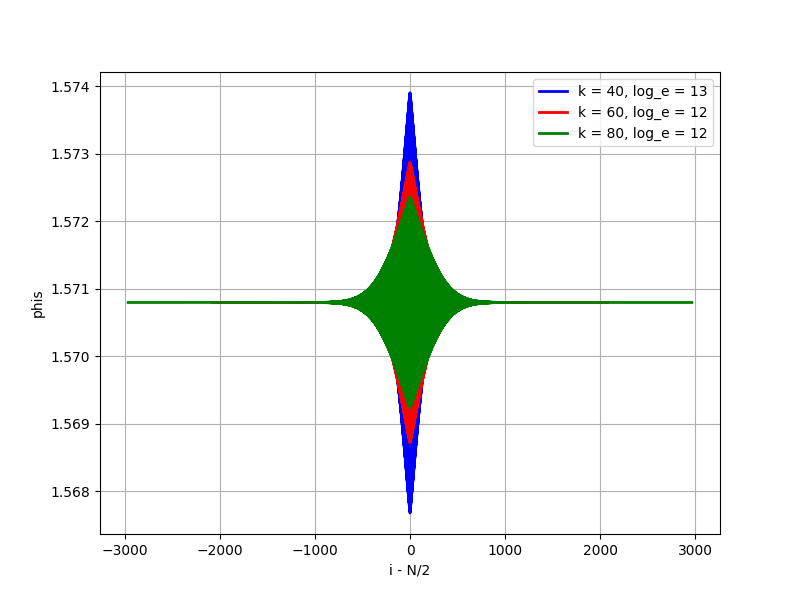

In [4]:
# -----------------------------------------
# --- Plot angles ----
# -----------------------------------------
mix.reload_module(eqsvt)

# plot_angles([0,1], xlim = [-10, 10]) 
# eqsvt.plot_angles(dds_, [id_comp_]) 

eqsvt.plot_angles(
    dds_, 
    [1, 2, 3], 
    flag_save = True & flag_save_gl_,
    path_save_plots = path_save_plots_,
    flag_shifted = False
) 

maximum difference between pos. and neg. max angles: 6.156e-05


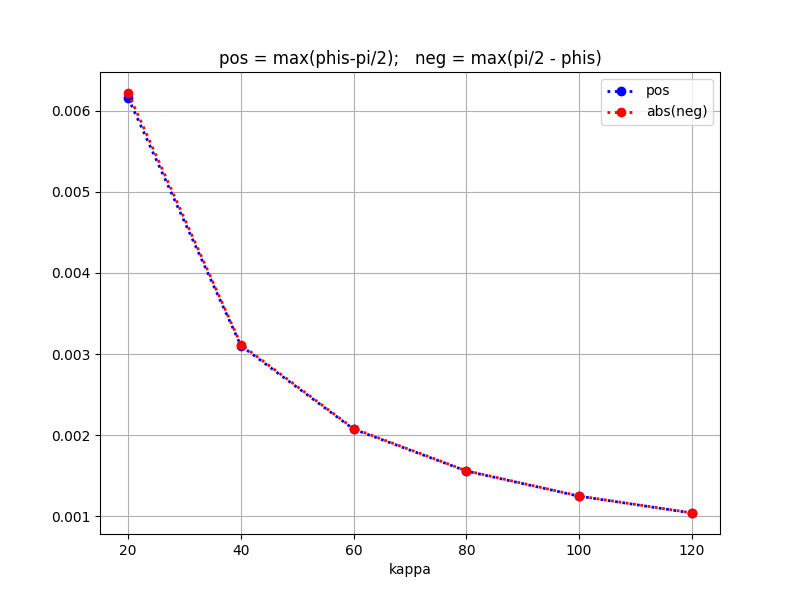

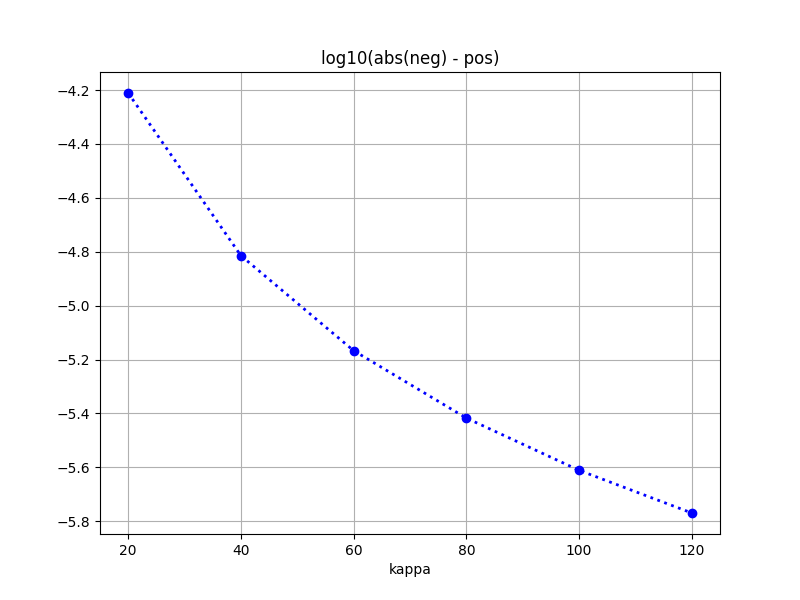

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//log_diff_pos_neg.dat


In [5]:
# ------------------------------------------
# --- Plot miximum values of the angles ----
# ------------------------------------------
mix.reload_module(eqsvt)
eqsvt.plot_max(
    dds_,
    flag_save = True & flag_save_gl_,
    path_save_plots = path_save_plots_
)


--- Estimation coefs for neg amplitudes ---
max. abs. err: 4.716e-14


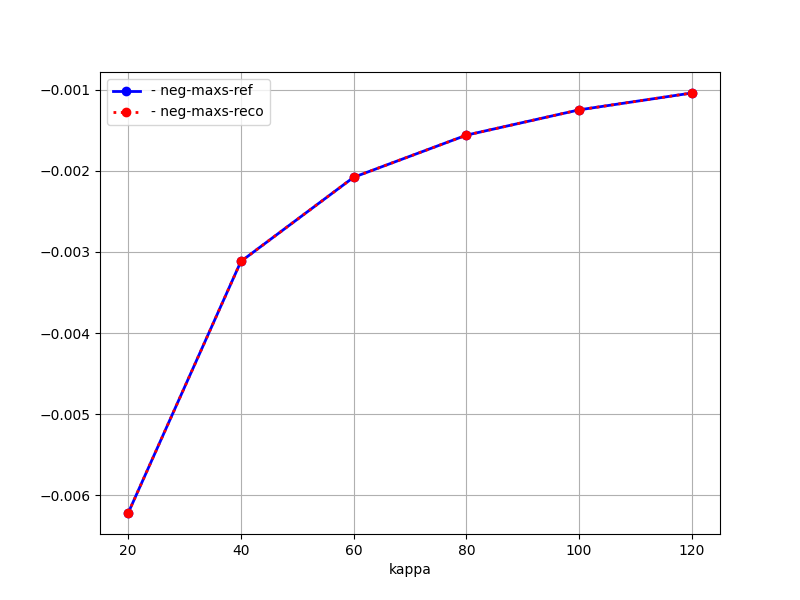


--- Estimation coefs for pos amplitudes ---
max. abs. err: 9.260e-12


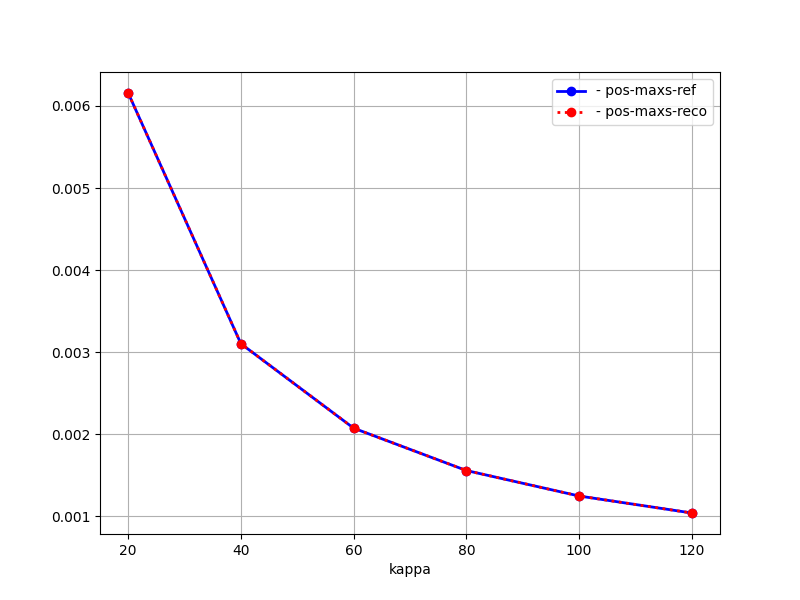

In [7]:
# ---------------------------------------------------------------------------------------------------
# --- COMPUTE the coefficients to describe the change in the maximum and minimum angles ---
mix.reload_module(eqsvt)
coefs_ampl_neg_, coefs_ampl_pos_ = eqsvt.compute_coefs_amplitudes(
    dds_,
    Ncoefs = 4,
    flag_save = False & flag_save_gl_,
    path_save_plots = path_save_plots_
)


--- Estimation coefs for neg Na ---
max. abs. err: 5.659e-01


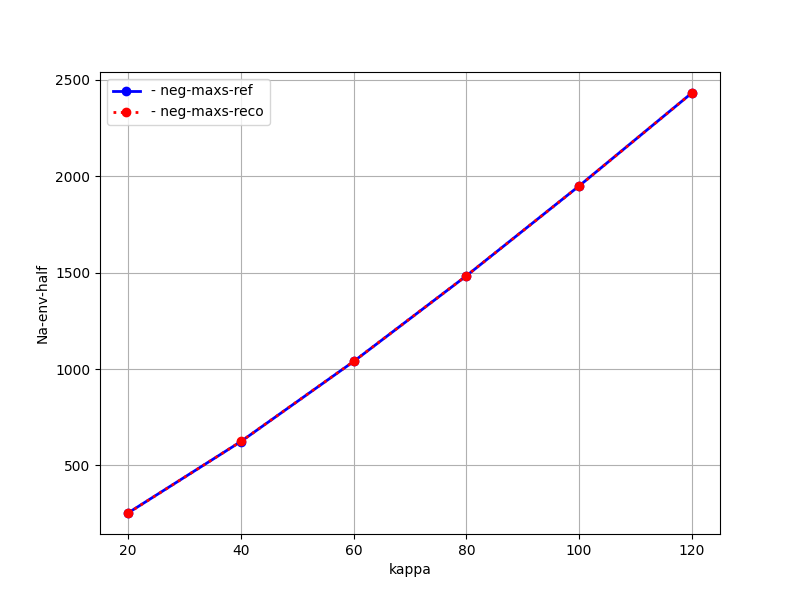


--- Estimation coefs for pos Na ---
max. abs. err: 6.048e-01


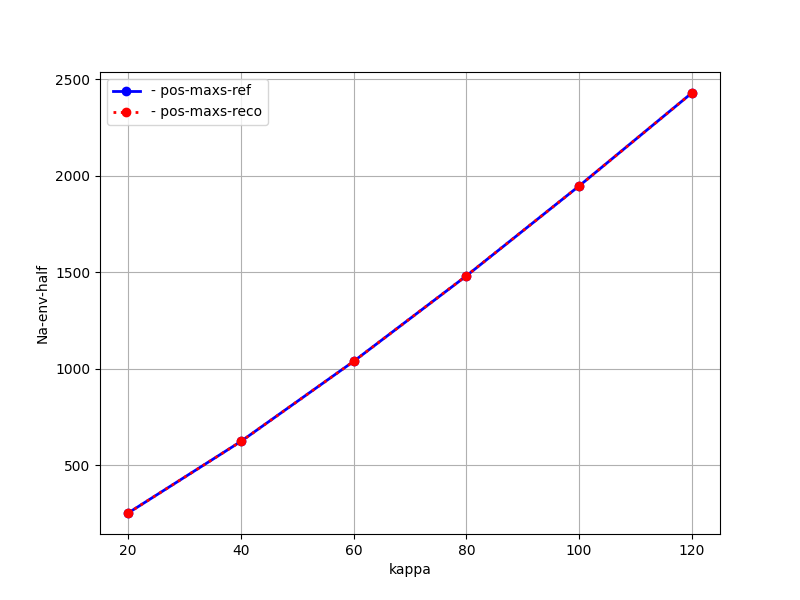

[-0.098  9.744]
[-0.405  9.741]


In [8]:
# ---------------------------------------------------------------------------------------------------
# --- COMPUTE the coefficients to describe the change in the number of angles for each envelop ---
mix.reload_module(eqsvt)
coefs_Na_neg_, coefs_Na_pos_ = eqsvt.compute_coefs_Na(
    dds_,
    Ncoefs = 2,
    flag_save = True & flag_save_gl_,
    path_save_plots = path_save_plots_
)
print(coefs_Na_neg_)
print(coefs_Na_pos_)


full number of angles: 5930
N of NEG. peaks: 2966
N of POS. peaks: 2964

N_env-half-NEG: 1483
N_env-half-POS: 1482
The envelop for the kappa = 80 is taken.


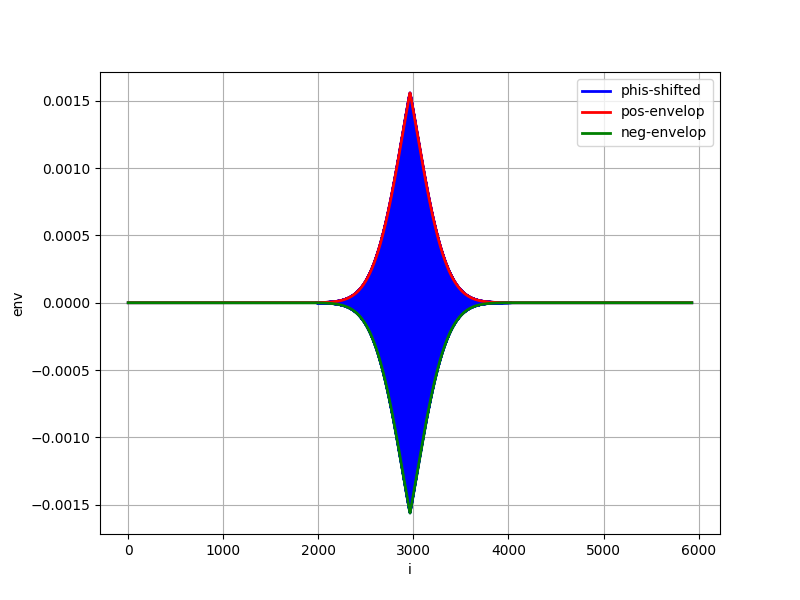

Normalized POS. ENV: max. absolute error: 3.878e-13
Normalized NEG. ENV: max. absolute error: 2.734e-13


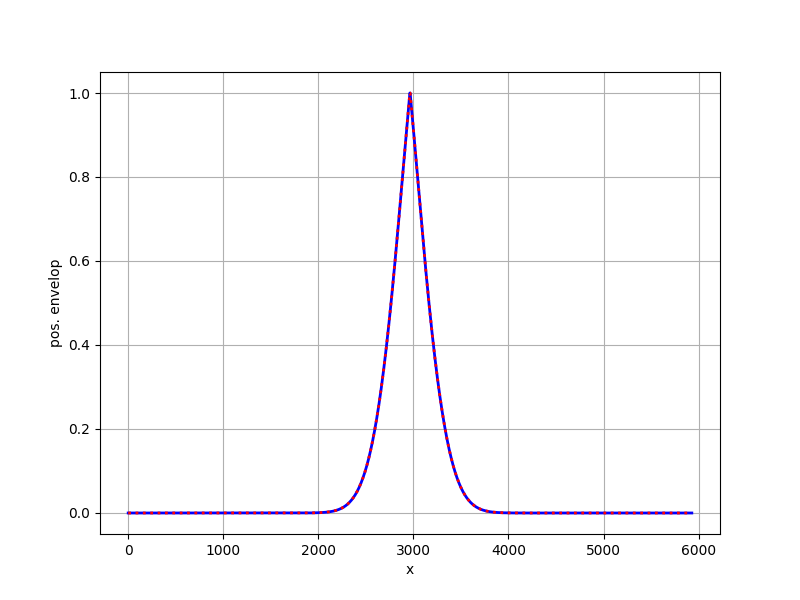

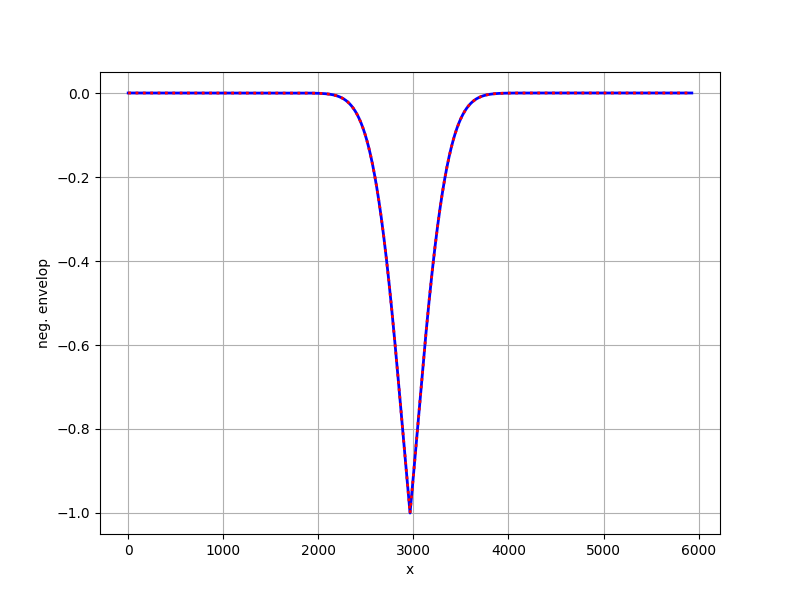



--- Reconstructing the QSVT angles for the same kappa ---
1. The envelop of the QSVT angles are approximated by the computed coefs.
2. The number of the QSVT angles and their absolute amplitudes are taken from the reference QSVT case.

max-abs-err in final reconstructed QSVT angles: 6.661e-16


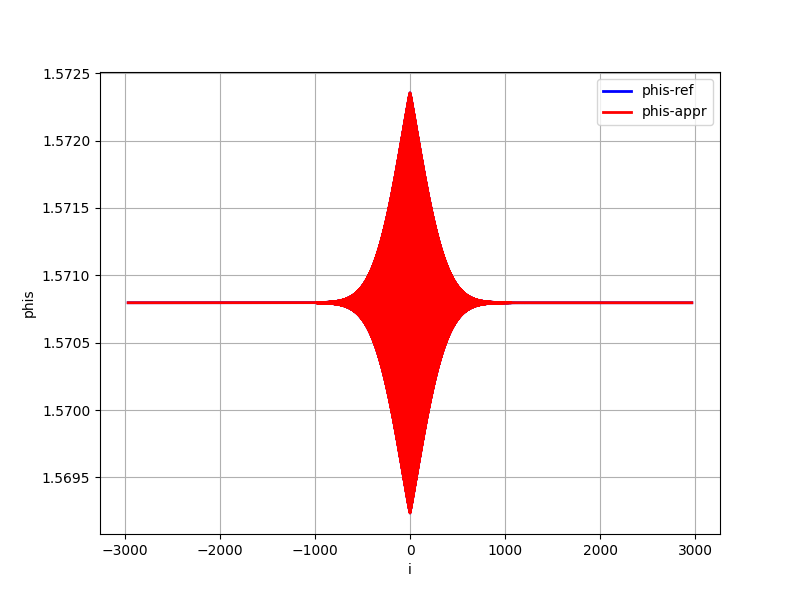

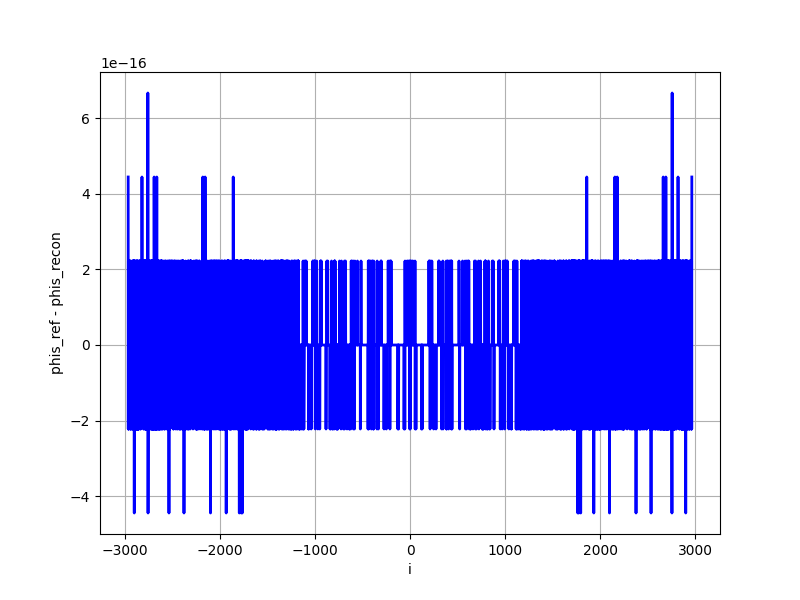

In [9]:
# ----------------------------------------------------------------------------------------
# --- COMPUTE the coefficients to describe the envelop of the QSVT angles ---
# ----------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
coefs_shape_neg_, coefs_shape_pos_, N_half_env_neg_, N_half_env_pos_, phis_appr_ = \
    eqsvt.compute_coefs_envelop(
        dds_[id_comp_],
        Ncoefs = Ncoefs_, 
        flag_plot_envelop = True, 
        flag_plot_shape = True,
        flag_reconstruct = True
    )


--------------------------------------------------------------------
N-coefs = 40

full number of angles: 5930
N of NEG. peaks: 2966
N of POS. peaks: 2964

N_env-half-NEG: 1483
N_env-half-POS: 1482
The envelop for the kappa = 80 is taken.
Normalized POS. ENV: max. absolute error: 3.878e-13
Normalized NEG. ENV: max. absolute error: 2.734e-13

--------------------------------------------------------------------
N-coefs = 30

full number of angles: 5930
N of NEG. peaks: 2966
N of POS. peaks: 2964

N_env-half-NEG: 1483
N_env-half-POS: 1482
The envelop for the kappa = 80 is taken.
Normalized POS. ENV: max. absolute error: 6.535e-12
Normalized NEG. ENV: max. absolute error: 6.464e-12

--------------------------------------------------------------------
N-coefs = 20

full number of angles: 5930
N of NEG. peaks: 2966
N of POS. peaks: 2964

N_env-half-NEG: 1483
N_env-half-POS: 1482
The envelop for the kappa = 80 is taken.
Normalized POS. ENV: max. absolute error: 7.566e-08
Normalized NEG. ENV:

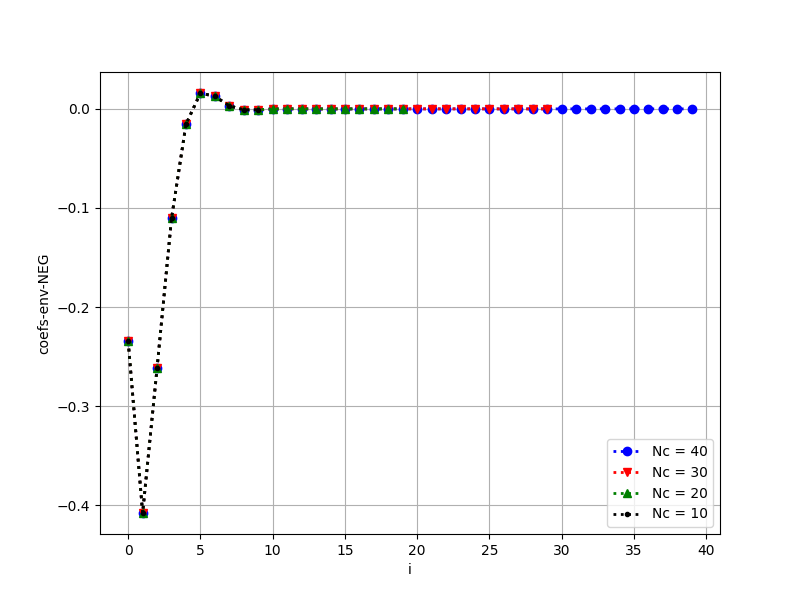

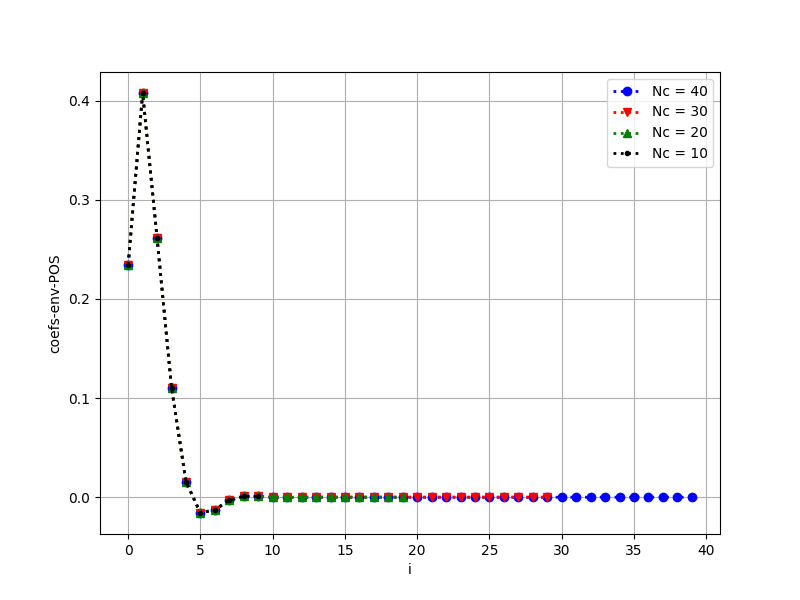

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//Ch_coefs_pos_Nc40.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//Ch_coefs_pos_Nc30.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//Ch_coefs_pos_Nc20.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//Ch_coefs_pos_Nc10.dat


In [33]:
# ------------------------------------------------------
# --- Plot the coefficients for the envelop ---
# ------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.plot_env_coefs(
    dds_[id_comp_], 
    Ncoefs_arrs = [40, 30, 20, 10],
    flag_save = True & flag_save_gl_,
    path_save_plots = path_save_plots_
)


full number of angles: 1014
N of NEG. peaks: 508
N of POS. peaks: 506

N_env-half-NEG: 254
N_env-half-POS: 253
The envelop for the kappa = 20 is taken.
Normalized POS. ENV: max. absolute error: 2.436e-10
Normalized NEG. ENV: max. absolute error: 2.647e-10

full number of angles: 2496
N of NEG. peaks: 1248
N of POS. peaks: 1248

N_env-half-NEG: 624
N_env-half-POS: 624
The envelop for the kappa = 40 is taken.
Normalized POS. ENV: max. absolute error: 7.793e-10
Normalized NEG. ENV: max. absolute error: 6.864e-10

full number of angles: 4156
N of NEG. peaks: 2078
N of POS. peaks: 2078

N_env-half-NEG: 1039
N_env-half-POS: 1039
The envelop for the kappa = 60 is taken.
Normalized POS. ENV: max. absolute error: 3.410e-08
Normalized NEG. ENV: max. absolute error: 3.432e-08

full number of angles: 5930
N of NEG. peaks: 2966
N of POS. peaks: 2964

N_env-half-NEG: 1483
N_env-half-POS: 1482
The envelop for the kappa = 80 is taken.
Normalized POS. ENV: max. absolute error: 7.566e-08
Normalized NEG

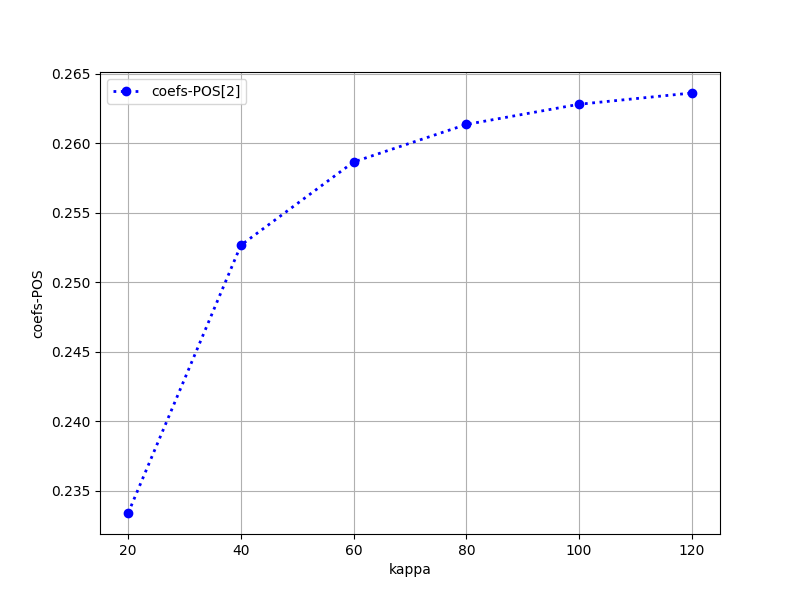

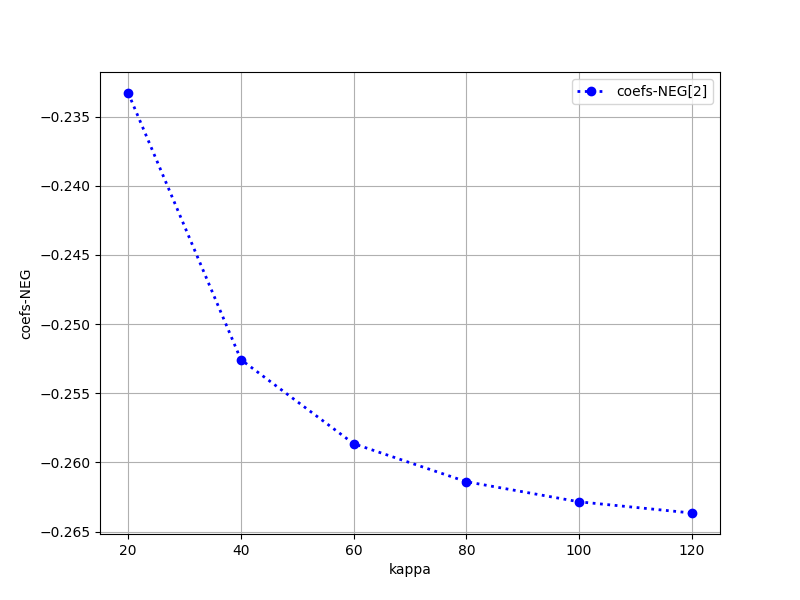

In [13]:
# ---------------------------------------------------------------------------------------------
# --- Plot coefficients-envelop for various reference kappa ---
# ---------------------------------------------------------------------------------------------
mix.reload_module(eqsvt)

# ids_coef = [0, 1, 3, 10]
# ids_coef = [18, 19]
ids_coef = [2]
eqsvt.plot_coefs_var_kappa(dds_, Ncoefs_, ids_coef)

del ids_coef

N-angles: 5930
kappa: 80.0
coef-norm: 1.250e-01

max. angle - np.pi/2: 1.557e-03
min. angle - np.pi/2: -1.561e-03
max-abs-err: 6.964e-13


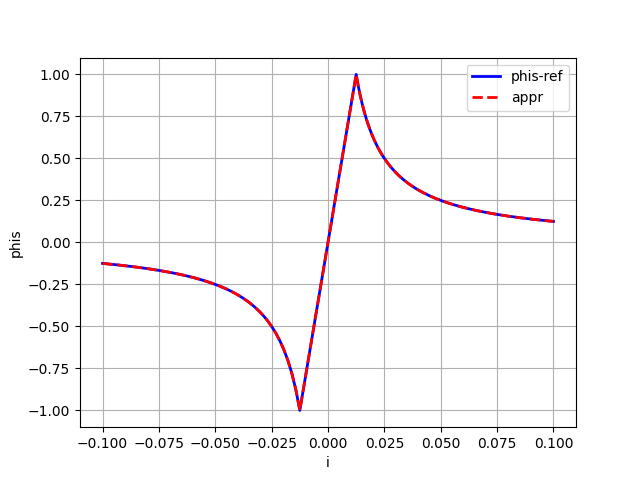

In [10]:
# -------------------------------------------------------
# --- Compute 1/x using a sequence of rotations ---
# -------------------------------------------------------
mix.reload_module(eqsvt)

phi_comp = np.array(phis_appr_)
# phi_comp = np.array(dds_[id_comp_]["phis"])

# padding_array = np.array([np.pi/2.] * 10001)
# phi_comp = np.concatenate(
#     (padding_array, phi_comp, padding_array)
# )

eqsvt.construct_inverse_function(
    phi_comp,
    kappa = dds_[id_comp_]["function-parameter"], 
    coef_norm = dds_[id_comp_]["factor-norm"]
)

------------------
Chosen kappa: 60.0
Na: 4156
ref: N-neg: 2078
ref: N-pos: 2078
------------------
Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case3-Nc40.hdf5
When simulated:  02/08/2024: 14:50:39
Data for-inversion
kappa: 80.000
factor-norm: 0.125
N-env-half-neg: 1483
N-env-half-pos: 1482
N-coefs-envelop-neg: 40
N-coefs-envelop-pos: 40
Na_rec-rec: 4156
Done.
N-ref: 4156
N-rec: 4156

diff in max, min: -9.260e-12, 4.707e-14
max. abs. err: 7.097e-05


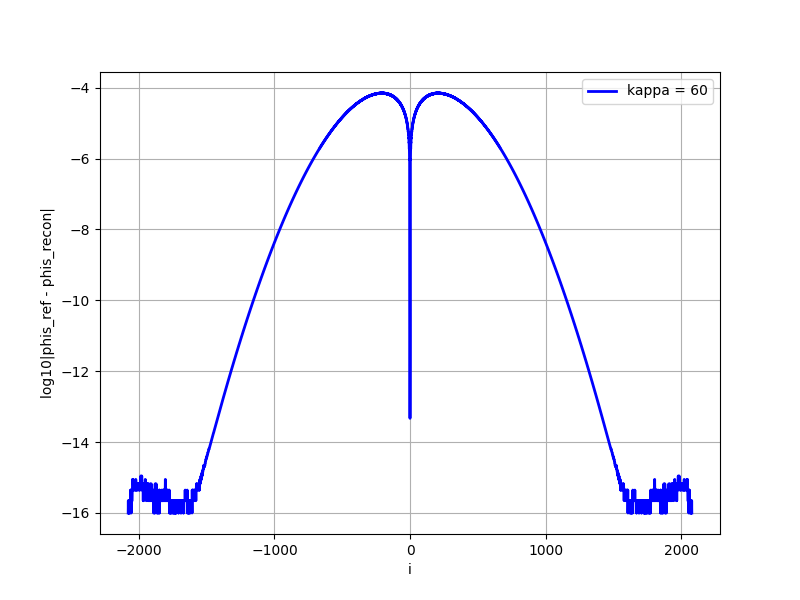

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//env_err_k60.dat
------------------
Chosen kappa: 80.0
Na: 5930
ref: N-neg: 2966
ref: N-pos: 2964
------------------
Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case3-Nc40.hdf5
When simulated:  02/08/2024: 14:50:39
Data for-inversion
kappa: 80.000
factor-norm: 0.125
N-env-half-neg: 1483
N-env-half-pos: 1482
N-coefs-envelop-neg: 40
N-coefs-envelop-pos: 40
Na_rec-rec: 5930
Done.
N-ref: 5930
N-rec: 5930

diff in max, min: 7.811e-12, 1.710e-14
max. abs. err: 7.811e-12


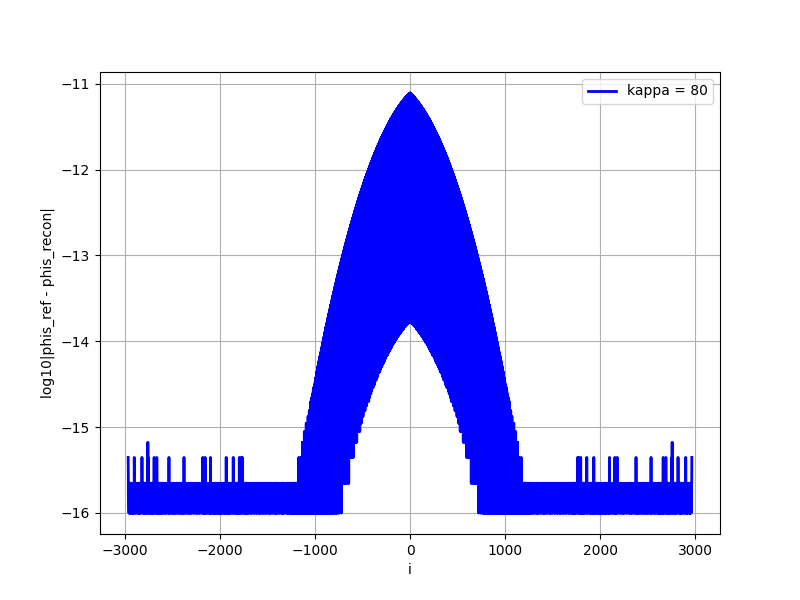

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//env_err_k80.dat
------------------
Chosen kappa: 100.0
Na: 7794
ref: N-neg: 3898
ref: N-pos: 3896
------------------
Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case3-Nc40.hdf5
When simulated:  02/08/2024: 14:50:39
Data for-inversion
kappa: 80.000
factor-norm: 0.125
N-env-half-neg: 1483
N-env-half-pos: 1482
N-coefs-envelop-neg: 40
N-coefs-envelop-pos: 40
Na_rec-rec: 7794
Done.
N-ref: 7794
N-rec: 7794

diff in max, min: 6.044e-12, -9.326e-15
max. abs. err: 3.134e-05


C:\Users\novikau1\AppData\Local\Temp\ipykernel_35584\3041184851.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(eqsvt.FIG_SIZE_W_,eqsvt.FIG_SIZE_H_))


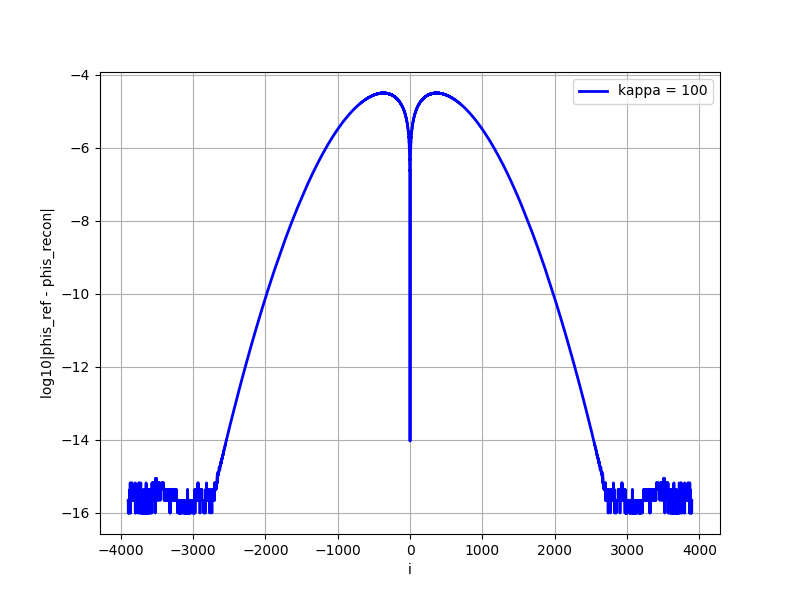

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//env_err_k100.dat


In [15]:
# ---------------------------------------------------------------------------------------------
# --- Compare the reference QSVT angles and the reconstructed angles ---
# ---------------------------------------------------------------------------------------------
# Here the QSVT angles are reconstructed without using any parameters from the reference case.
mix.reload_module(eqsvt)

def compare_reconstructed_and_known_angles(dds, ids_ch, flag_save, path_save_plots):
    def compare_angles(phis_ref, phis_rec):
        phis_ch = np.array(phis_ref)

        print("N-ref: {:d}".format(len(phis_ref)))
        print("N-rec: {:d}".format(len(phis_rec)))

        print()
        print("diff in max, min: {:0.3e}, {:0.3e}".format(
            np.max(phis_rec) - np.max(phis_ref),
            np.min(phis_rec) - np.min(phis_ref),
        ))

        max_abs_err = np.max(np.abs(phis_ch - phis_rec))
        print("max. abs. err: {:0.3e}".format(max_abs_err))
        return
    # -------------------------------------------------------------------------

    for id_ch in ids_ch:
        kappa_ch = dds[id_ch]["function-parameter"]
        phis_ref = np.array(dds[id_ch]["phis"])
        Na = len(dds[id_ch]["phis"])

        temp = eqsvt.extract_env(
            np.array(phis_ref- np.pi/2.),
            np.mod(Na//2,2)
        )

        N_neg = len(temp["neg-i"])
        N_pos = len(temp["pos-i"])

        print("------------------")
        print("Chosen kappa: {:0.1f}".format(kappa_ch))
        print("Na: {:d}".format(Na))
        print("ref: N-neg: {:d}".format(N_neg))
        print("ref: N-pos: {:d}".format(N_pos))
        print("------------------")

        Nh_neg = N_neg//2
        if(np.mod(N_neg, 2) == 1):
            Nh_neg += 1
            

        phis_appr_fully, _ = eqsvt.estimate_angles(
            eqsvt.read_estimation(id_case_, Ncoefs_), 
            kappa_goal = kappa_ch,
            # # --- comment to compute the actual number of the QSVT estimated angles ---
            Nh_neg_ref = Nh_neg,
            Nh_pos_ref = N_pos//2
        )


        # --- Compare angles ---
        compare_angles(phis_ref, phis_appr_fully)


        # --- Compute the difference ---
        array_ids =  np.array(range(Na)) - Na//2
        log_diff = np.zeros(Na)
        for ii in range(Na):
            temp = np.abs(phis_appr_fully[ii] - phis_ref[ii])
            if temp <= 1e-16:
                temp = 1e-16
            log_diff[ii] = np.log10(temp)

        # --- Plot the difference ---
        fig = plt.figure(figsize=(eqsvt.FIG_SIZE_W_,eqsvt.FIG_SIZE_H_))
        ax = fig.add_subplot(111)
        ax.plot(
            array_ids, 
            log_diff, 
            color="b", linewidth = 2, linestyle='-', 
            label = "kappa = {:d}".format(int(kappa_ch))
        )
        plt.xlabel('i')
        plt.ylabel("log10|phis_ref - phis_recon|")
        plt.legend()
        plt.grid(True)
        plt.show()

        # --- Saving data ---
        if flag_save_gl_:
            mix.save_dat_plot_1d_file(
                path_save_plots + "/env_err_k{:d}.dat".format(int(kappa_ch)), 
                array_ids, 
                log_diff
            )
# --------------------------------------------------------------

compare_reconstructed_and_known_angles(
    dds_,
    ids_ch = [2, 3, 4],
    flag_save = True & flag_save_gl_, 
    path_save_plots = path_save_plots_
)   

In [62]:
def get_Na(k):
    temp1 = int(13800./(300. * np.log10(300)) * k * np.log10(k))
    temp2 = int((13800. - 275.)/(300. * np.log10(300)) * k * np.log10(k)) + 275

    if np.mod(temp1, 2) == 1:
        temp1 += 1
    if np.mod(temp2, 2) == 1:
        temp2 += 1

    return temp1, temp2 
# -----------------------------------------------------------------------------------------


get_Na(160)

(6548, 6694)